# INM430: Principles of Data Science: Lab05

# Regression

## Tutorials and Exercises

### Import necessary libraries

In [1]:
# for basic operations
import pandas as pd
import numpy as np

# for visualisation
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import pylab
import seaborn as sns

# for statistics
import math
import statsmodels.api as sm
import scipy
from scipy import stats
import scipy.stats.distributions as dist

# regression
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report

# to see all the columns in tabular view
pd.set_option('display.max_columns', None)

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Part 1: Linear regression to analyse relationships between house prices and other variables

#### Simple Linear Regression

##### 1. Load the data

In [2]:
df_h = pd.read_csv("train.csv")

In [3]:
df_h.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500

In [4]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### 2. Find your variables

The dependent variable will be price:
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

The independent variable will be living area:
- GrLivArea: Above grade (ground) living area square feet

In [5]:
df_h[['GrLivArea', 'SalePrice']].describe()

GrLivArea      SalePrice
count  1460.000000    1460.000000
mean   1515.463699  180921.195890
std     525.480383   79442.502883
min     334.000000   34900.000000
25%    1129.500000  129975.000000
50%    1464.000000  163000.000000
75%    1776.750000  214000.000000
max    5642.000000  755000.000000

##### 3. Check out your variables

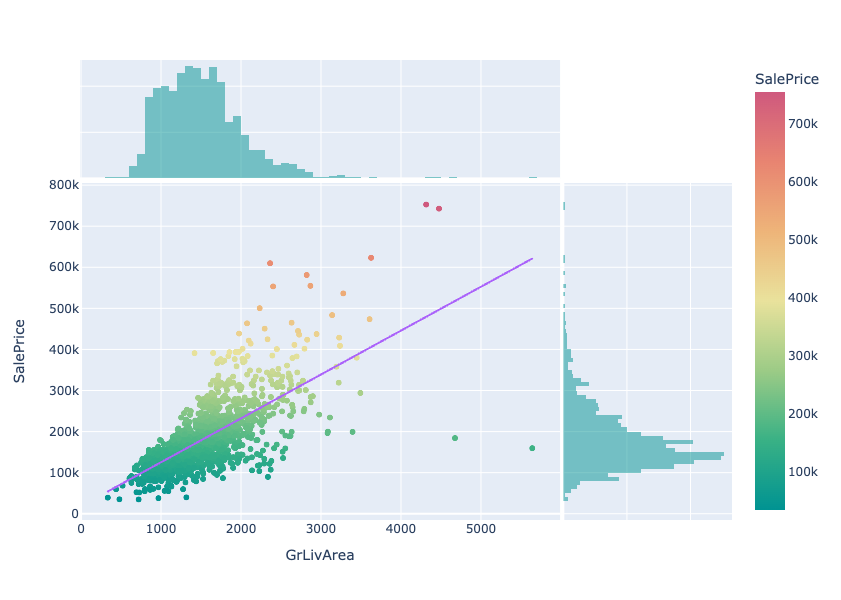

In [6]:
fig = px.scatter(df_h, 
                 x="GrLivArea", 
                 y="SalePrice", 
                 color="SalePrice",
                 color_continuous_scale=px.colors.diverging.Temps,
                 marginal_x="histogram", 
                 marginal_y="histogram",
                 trendline="ols", # ols stands for ordinary least squares
                 height = 600,
                 width = 1000
                )
fig.show()

It looks like there are 2 outliers having **high GrLivArea** vs **low SalePrice** in the data. Lets remove these two points since they might affect our model performance badly. The objective here is to create a good model for predicting house price accurately with living area input, so removing these two points from the data aligns with our ultimate goal. 

In [7]:
# remove outliers
df_h_f = df_h[df_h['GrLivArea'] < 4676]

Check the shapes to ensure only 2 points we identified as outliers have been removed from the data frame.

In [8]:
df_h.shape

(1460, 81)

In [9]:
df_h_f.shape

(1458, 81)

##### 4. Build a simple linear regression model

There is a relationship between two variables.

In [10]:
# create dependent and independent variable data frames
house_X = df_h_f[['GrLivArea']]
house_y = df_h_f[['SalePrice']]

In [11]:
# split the data into training/testing sets
house_X_train, house_X_test, house_y_train, house_y_test = train_test_split(house_X, house_y, test_size=0.1, random_state=42)

print('---')
print("Shape of the independent variable's training dataset: ", house_X_train.shape)
print("Shape of the independent variable's test dataset: ", house_X_test.shape)
print('---')
print("Shape of the dependent variable's training dataset: ", house_y_train.shape)
print("Shape of the dependent variable's test dataset: ", house_y_test.shape)
print('---')

---
Shape of the independent variable's training dataset:  (1312, 1)
Shape of the independent variable's test dataset:  (146, 1)
---
Shape of the dependent variable's training dataset:  (1312, 1)
Shape of the dependent variable's test dataset:  (146, 1)
---


In [12]:
# create linear regression object
regr1 = linear_model.LinearRegression()

# train the model using the training sets - these are the ones with higher size
regr1.fit(house_X_train, house_y_train)

# step 6 - make predictions using the testing set
house_y_pred = regr1.predict(house_X_test)

##### 5. Quantify the variation in price due to floor area

In [13]:
print('---')

# the intercept
print("Intercept: ", regr1.intercept_)

# the coefficients
print("Coefficients: ", regr1.coef_)

# the mean squared error
print("Mean squared error: %.2f" % mean_squared_error(house_y_test, house_y_pred))

# the coefficient of determination: 1 is perfect prediction - R2
print("Coefficient of determination: %.2f" % r2_score(house_y_test, house_y_pred))

print('---')

---
Intercept:  [4172.26056605]
Coefficients:  [[116.78123477]]
Mean squared error: 2557747761.62
Coefficient of determination: 0.54
---


##### Comments

**Intercept (B0):** The estimated average value of SalePrice when the values of GrLivArea is zero.

**Coefficients (B1):** Slope for our independent variable, GrLivArea.

**Mean Squared Error (MSE):**

**Coefficient of determination (R2):** Quantifies how much of the variation in the dependent variable is due to the independent variable. So, in our case, **0.54** of the variation in the **SalePrice** is due to **GrLivArea**, that is, slightly more than half of the variation can be explained by inputs. 

##### Equation

**SalePrice** = 116.78 \* **GrLivArea** + 4172.26

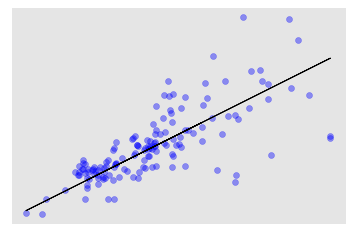

In [14]:
# plot outputs
plt.scatter(house_X_test, house_y_test, color="blue", alpha = 0.4) # observed
plt.plot(house_X_test, house_y_pred, color="black", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

We can see the fitted regression line (blue) against observed points (black). There are some observation points having a long distence to the fitted regression line. This could be the indication of having R2 value 0.54.

##### 7. Calculate the residuals

In [15]:
# check the type of the house_y_test
type(house_y_test)

pandas.core.frame.DataFrame

In [16]:
# check the type of the house_y_pred
type(house_y_pred)

numpy.ndarray

In [17]:
# observed data for dependent variable
df_obsv = house_y_test.copy()
df_obsv.rename(columns={'SalePrice':'observed'}, inplace = True)
df_obsv.reset_index(drop=True, inplace=True)

# predicted data for dependent variable - convert to pandas data frame from numpy array
df_pred = pd.DataFrame(house_y_pred, columns = ['predicted'])

In [18]:
# create a data frame including observed and predicted values
df_res = pd.concat([df_obsv, df_pred], axis=1).round(2)

In [19]:
# calculate residual column
df_res['residual'] = df_res['observed'] - df_res['predicted']

In [20]:
df_res.head()

observed  predicted   residual
0    190000  228742.58  -38742.58
1    100000  119435.34  -19435.34
2    115000  124223.37   -9223.37
3    159000  198496.24  -39496.24
4    315500  193357.86  122142.14

In [21]:
df_res.describe()

observed      predicted       residual
count     146.000000     146.000000     146.000000
mean   180040.849315  176379.788767    3661.060548
std     74829.063599   63723.755905   50615.132109
min     35311.000000   43177.190000 -167092.030000
25%    129125.000000  126734.162500  -17709.600000
50%    169750.000000  172512.410000    3993.535000
75%    209250.000000  205386.327500   25600.650000
max    451950.000000  364559.150000  179648.020000

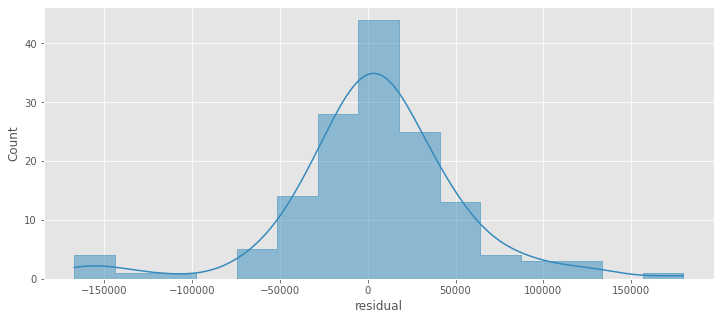

In [22]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=df_res, x="residual", kde=True, element = 'step', bins=15)

##### Comments

Mean of the residual column is very close to 0 when compared to the absolute size of the data. And the residuals are normally distributed as they should be.

#### Multiple Linear Regression

##### 1. Find the top correlated numerical variables

In [23]:
# select only numerical columns from house data frame
df_h_num = df_h_f.select_dtypes(include=[np.number])
df_h_num.head(2)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   

   SalePrice  
0     208500  
1     181500

In [24]:
# create correlation data frame
df_h_corr = df_h_num.corr()

In [25]:
# check the correlation SalePrice column with the other numerical columns and filter for top 10 (the most correlated 10 variables)
print(df_h_corr['SalePrice'].sort_values(ascending=False)[:10], '\n')

SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
Name: SalePrice, dtype: float64 



##### 2. Choose another variable to add to the model

Let's see how these 10 variables correlate to GrLiveArea column. We should select a column having a correlation less than 0.5 for multiple linear regression to work properly.

In [26]:
# start from index 8 to see only the ones having correlation less than 0.5
print(df_h_corr['GrLivArea'].sort_values(ascending=False)[8:], '\n')

GarageCars       0.475442
Fireplaces       0.456993
GarageArea       0.456358
HalfBath         0.418817
TotalBsmtSF      0.408793
MasVnrArea       0.371256
LotFrontage      0.355459
OpenPorchSF      0.302569
YearRemodAdd     0.286758
WoodDeckSF       0.247120
BsmtUnfSF        0.247073
LotArea          0.232927
GarageYrBlt      0.227840
YearBuilt        0.194397
BsmtFinSF1       0.142196
LowQualFinSF     0.140632
PoolArea         0.115999
ScreenPorch      0.107768
KitchenAbvGr     0.105688
MSSubClass       0.076778
MoSold           0.057296
3SsnPorch        0.022520
BsmtFullBath     0.014455
EnclosedPorch    0.012976
Id               0.003138
MiscVal         -0.001637
BsmtFinSF2      -0.007138
BsmtHalfBath    -0.017214
YrSold          -0.035971
OverallCond     -0.077423
Name: GrLivArea, dtype: float64 



We will select **GarageCars** variable since it has the highest correlation with sales price, while having less than 0.5 correlation with **GrLiveArea**.

***GarageArea** can also be selected for another trial to examine the difference in regression model performance.*

##### 3. Create a new model with two independent variables

Create a **multiple** linear regression model with the same methodology we applied above in the simple linear regression. Create a train and test X data frames with 2 variables (**GrLiveArea and GarageCars**) instead of one (**GrLivArea**).

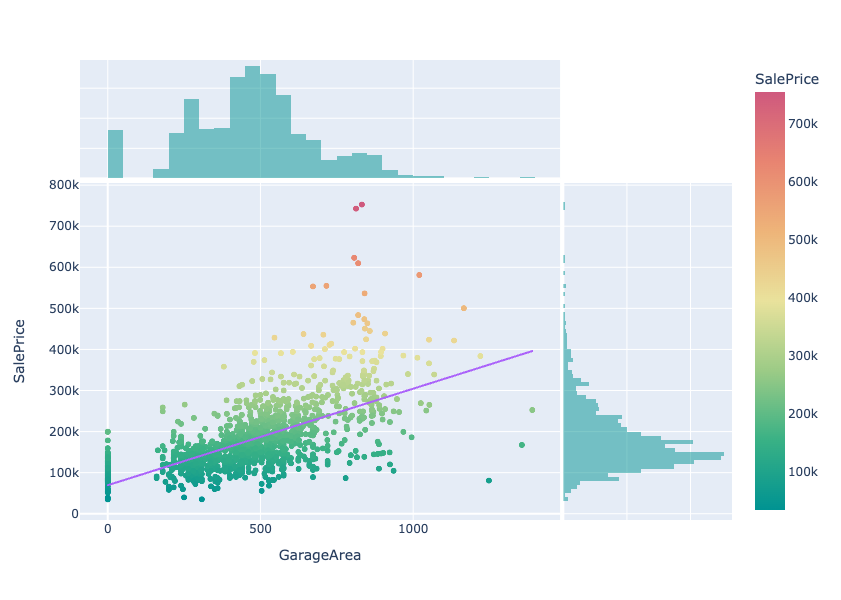

In [27]:
# check the scatterplot for the new independent variable GarageArea and dependent variable SalePrice
fig = px.scatter(df_h_f, 
                 x="GarageArea", 
                 y="SalePrice", 
                 color="SalePrice",
                 color_continuous_scale=px.colors.diverging.Temps,
                 marginal_x="histogram", 
                 marginal_y="histogram",
                 trendline="ols", # ols stands for ordinary least squares
                 height = 600,
                 width = 1000
                )
fig.show()

##### Outliers

We should consider removing outliers, since we want a linear relationship between dependent and independent variable and and also we want that our GarageArea (one of the independent variables) input can explain as much variation in the SalesPrice (dependent variable) as possible (R2 close to 1).

- There are 3 points having very high GarageArea and low SalePrice
- There are multiple points having 0 GarageArea, i.e. no garage (This does not serve our goal since there is no garage in place)

Removing these points will improve the linearity and hopefully the multiple linear regression fit.

In [28]:
print('---')
print("Total number of outliers to be removed: ", np.count_nonzero((np.where(np.logical_or(df_h_f['GarageArea'] > 1248, df_h_f['GarageArea'] == 0)))))
print('---')

---
Total number of outliers to be removed:  83
---


In [29]:
# remove outliers - GrLivArea outliers removed version (df_h_f)
df_h_f2 = df_h_f[np.logical_and(df_h_f['GarageArea'] <= 1248, df_h_f['GarageArea'] != 0)]

Check the shapes to ensure only 2 points we identified as outliers have been removed from the data frame.

In [30]:
df_h_f.shape

(1458, 81)

In [31]:
df_h_f2.shape

(1375, 81)

Check if correlation between two independent variables less than 0.5 condition is still valid after removing 83 outliers.

In [32]:
df_h_f2_num  = df_h_f2.select_dtypes(include=[np.number])
df_h_f2_corr = df_h_f2_num.corr()
print("Correlation after removing 83 outliers is: ", df_h_f2_corr['GrLivArea'].sort_values(ascending=False).loc['GarageArea'].round(2), '\n')

Correlation after removing 83 outliers is:  0.47 



It is still less than 0.5, so we can continue with the Multiple Linear Regression.

##### Build the model

In [33]:
# create dependent and independent variables data frames
house_m_X = df_h_f2[['GrLivArea', 'GarageArea']]
house_m_y = df_h_f2[['SalePrice']]

In [34]:
# split the data into training/testing sets
house_m_X_train, house_m_X_test, house_m_y_train, house_m_y_test = train_test_split(house_m_X, house_m_y, test_size=0.1, random_state=42)

print('---')
print("Shape of the independent variable's training dataset: ", house_m_X_train.shape)
print("Shape of the independent variable's test dataset: ", house_m_X_test.shape)
print('---')
print("Shape of the dependent variable's training dataset: ", house_m_y_train.shape)
print("Shape of the dependent variable's test dataset: ", house_m_y_test.shape)
print('---')

---
Shape of the independent variable's training dataset:  (1237, 2)
Shape of the independent variable's test dataset:  (138, 2)
---
Shape of the dependent variable's training dataset:  (1237, 1)
Shape of the dependent variable's test dataset:  (138, 1)
---


In [35]:
# create linear regression object
regr2 = linear_model.LinearRegression()

# train the model using the training sets - these are the ones with higher size
regr2.fit(house_m_X_train, house_m_y_train)

# step 6 - make predictions using the testing set
house_m_y_pred = regr2.predict(house_m_X_test)

##### Check the R2

In [36]:
print('---')

# the intercept
print("Intercept: ", regr2.intercept_)

# the coefficients
print("Coefficients: ", regr2.coef_)

# the mean squared error
print("Mean squared error: %.2f" % mean_squared_error(house_m_y_test, house_m_y_pred))

# the coefficient of determination: 1 is perfect prediction - R2
print("Coefficient of determination: %.2f" % r2_score(house_m_y_test, house_m_y_pred))

print('---')

---
Intercept:  [-26834.96234649]
Coefficients:  [[ 88.17572387 154.66548311]]
Mean squared error: 2638352948.57
Coefficient of determination: 0.70
---


##### Comments

**Intercept (B0):** The estimated average value of SalePrice when the values of GrLivArea and GarageArea are zero.

**Coefficients (B1, B2):** Slopes for our independent variables, GrLivArea and GarageArea.

**Mean Squared Error (MSE):**

**Coefficient of determination (R2):** Quantifies how much of the variation in the dependent variable is due to the independent variable. So, in our case, **0.7** of the variation in the **SalePrice** is due to **GrLivArea** and **GarageArea**, that is, 70% of the variation can be explained by inputs.

Multiple Linear Regression model improved compared to Simple Linear Regression model. The new model capture **more variation**.

##### Equation

**SalePrice** = 88.18 \* **GrLivArea** + 154.67 \* **GarageArea** - 26834.96

##### 5. Check the parameters

So the coefficient **B1 is for GrLivArea** and **B2 is for GarageArea** (the order we defined the independent variables data frame). 

Here, 
- B1 = 88.18 tells us that the average value of **SalePrice** increases by 88.18 dollars for each additional one square foot of **GrLivArea** with everything else constant
- B2 = 154.67 tells us that the average value of **SalePrice** increases by 154.67 dollars for each additional one square foot of **GarageArea** with everything else constant

By looking at the coefficients only, it looks like the effect of GarageArea is almost two fold of the effect of GrLivArea. However, unless we normalize the variables these cannot be compared although both have the same units (square feets).

##### 6. Study residuals

To study the residuals in Neighbourhood granularity let's predict the SalePrice for all rows in the dataframe and add the Neighbourhood column.

This way we can calculate the residuals for all records in the data frame and investigate a larger sample of residuals.

In [37]:
# extract SalePrice column for later
obsv = df_h_f2[['SalePrice']]

# reset index for later concetanation
obsv.reset_index(drop = True, inplace = True)

In [38]:
# extract neighbourhood column for later
nb = df_h_f2[['Neighborhood']]

# reset index for later concetanation
nb.reset_index(drop = True, inplace = True)

In [39]:
# create a new test set using all records 
house_m_X_test_all = df_h_f2[['GrLivArea', 'GarageArea']]

# reset index for later concetanation
house_m_X_test_all.reset_index(drop = True, inplace = True)

In [40]:
# make predictions using the all data
house_m_y_pred_all = regr2.predict(house_m_X_test_all)

pred = pd.DataFrame(house_m_y_pred_all, columns = ['predicted'])

# reset index for later concetanation
pred.reset_index(drop = True, inplace = True)

In [41]:
# concatenate predicted values and Neighborhood column 
df_res2 = pd.concat([obsv,  # observed values
                     pred,  # predicted values
                     nb],   # Neighborhood column
                    axis=1).round(2)

In [42]:
# rename columns
df_res2.rename(columns={'SalePrice':'observed'}, inplace = True)

In [43]:
# calculate residual column
df_res2['residual'] = df_res2['observed'] - df_res2['predicted']

In [44]:
df_res2.head(2)

observed  predicted Neighborhood  residual
0    208500  208702.21      CollgCr   -202.21
1    181500  155588.92      Veenker  25911.08

In [45]:
df_res2.describe()

observed      predicted       residual
count    1375.000000    1375.000000    1375.000000
mean   185461.965818  185092.547862     369.417956
std     79113.289965   62328.671575   47236.861253
min     35311.000000   49833.710000 -175844.370000
25%    134000.000000  141618.290000  -23168.335000
50%    167500.000000  176493.730000    -119.480000
75%    217750.000000  218672.000000   22572.350000
max    755000.000000  493582.620000  303218.850000

##### Residuals - Total

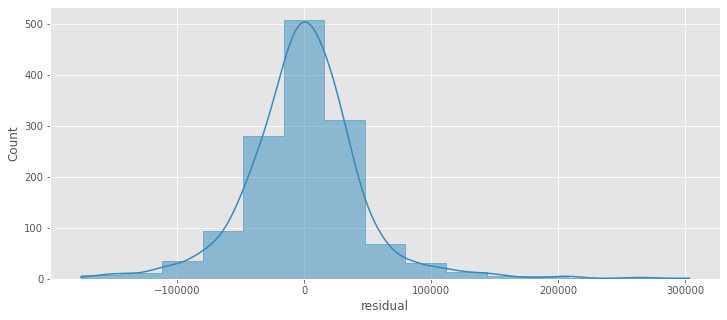

In [46]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=df_res2, x="residual", kde=True, element = 'step', bins=15)

##### Comments

Mean of the residual column is very close to 0 when compared to the absolute size of the data. And the residuals are normally distributed as they should be.

##### Residuals - Neighborhood Breakdown

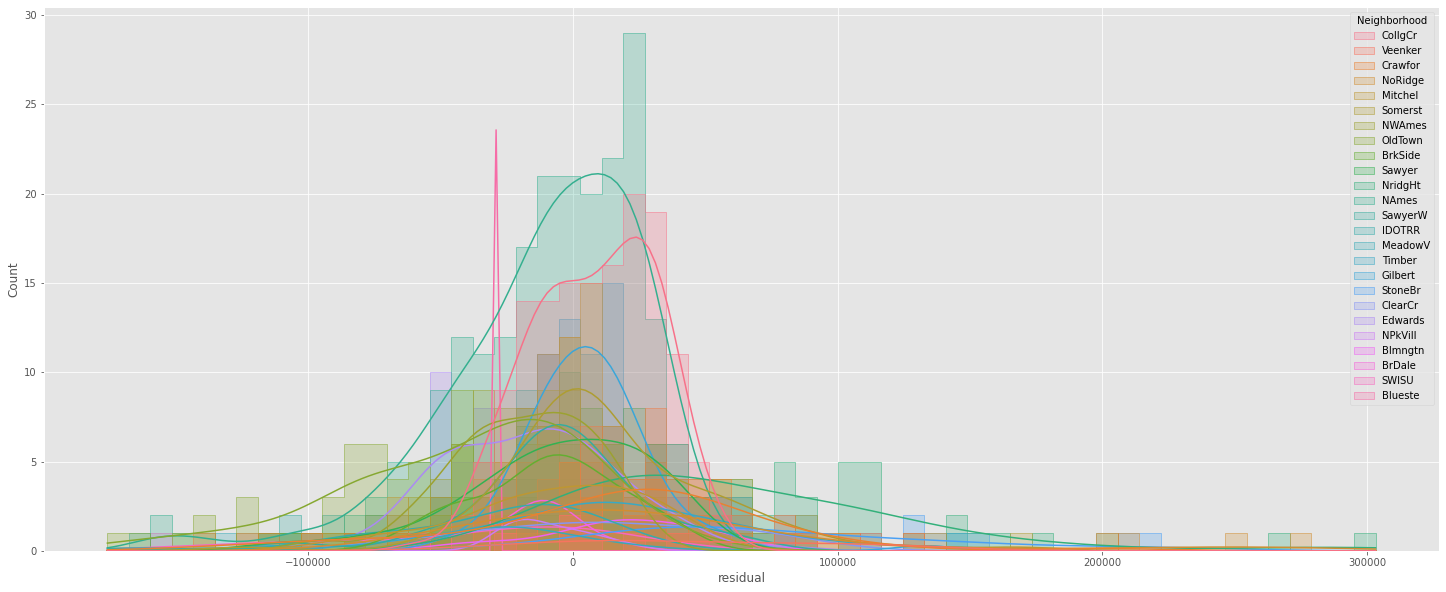

In [47]:
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.histplot(data=df_res2, x="residual", hue = 'Neighborhood', kde=True, element = 'step')

##### Comments

The Neighborhood breakdown above tells that in some Neighborhoods the data is poorly modelled. We can identify these by looking at the distribution, if it is normally distributed or not for every neighborhood. But with the data containing more than 10 categories, this kind of histogram plot will be too cluttered and hard to observe the problematic categories.

Another way to look at the performance of the model by neighborhood is to compare the residual mean for every Neighborhood. The closer to 0 the better the model performance is in this Neighborhood.

In [48]:
# create a data frame to show means of every Neighborhood
df_res2_inv = df_res2[["residual", "Neighborhood"]].groupby("Neighborhood").mean()

# reset index
df_res2_inv.reset_index(inplace = True)

# rename columns
df_res2_inv.rename(columns={'residual':'mean'}, inplace = True)

# take absolute of mean since we want to look at the absolute difference of residual mean to 0 for every Neighborhood
df_res2_inv['mean'] = df_res2_inv['mean'].abs()

In [49]:
df_res2_inv.head()

Neighborhood          mean
0      Blmngtn  18035.751765
1      Blueste  29131.860000
2       BrDale  15019.976000
3      BrkSide   9034.660625
4      ClearCr  11285.177407

In [50]:
df_res2_inv.shape

(25, 2)

It is not reasonable to compare absolute mean values, so we will normalize and rescale the values between 0 and 1.

In [51]:
# create normalized mean column
df_res2_inv['mean_norm'] = (df_res2_inv['mean'] - df_res2_inv['mean'].min()) / (df_res2_inv['mean'].max() - df_res2_inv['mean'].min())

# sort the data frame in descending order to see the worst performing categories in the model, i.e. highest distance to 0
df_res2_inv.sort_values("mean_norm", inplace = True, ascending = False)

# reset index
df_res2_inv.reset_index(drop = True, inplace = True)

In [52]:
# show top 10 Neighborhood having the worst affect on the model 
df_res2_inv.head(10)

Neighborhood          mean  mean_norm
0      StoneBr  73970.377200   1.000000
1      NridgHt  61109.181711   0.813643
2      Veenker  45261.180000   0.584008
3      OldTown  39652.783366   0.502743
4        SWISU  37892.664000   0.477239
5      NoRidge  31727.777805   0.387911
6       IDOTRR  30689.076897   0.372860
7      MeadowV  30086.523333   0.364129
8      Blueste  29131.860000   0.350297
9       NWAmes  18980.507123   0.203205

Removing these Neighborhood from the data and re-building the model will improve the performance of the model and our R2 value.

### Part 2: Linear regression to analyse relationships between crimes and socioeconomic characteristics

#### Simple Linear Regression

##### 1. Load the data

In [53]:
df_c = pd.read_csv("censusCrimeClean.csv")

In [54]:
df_c.head(2)

communityname  fold  population  householdsize  racepctblack  racePctWhite  \
0  Lakewoodcity     1        0.19           0.33          0.02          0.90   
1   Tukwilacity     1        0.00           0.16          0.12          0.74   

   racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  \
0          0.12         0.17         0.34         0.47         0.29   
1          0.45         0.07         0.26         0.59         0.35   

   agePct65up  numbUrban  pctUrban  medIncome  pctWWage  pctWFarmSelf  \
0        0.32       0.20       1.0       0.37      0.72          0.34   
1        0.27       0.02       1.0       0.31      0.72          0.11   

   pctWInvInc  pctWSocSec  pctWPubAsst  pctWRetire  medFamInc  perCapInc  \
0        0.60        0.29         0.15        0.43       0.39       0.40   
1        0.45        0.25         0.29        0.39       0.29       0.37   

   whitePerCap  blackPerCap  indianPerCap  AsianPerCap  OtherPerCap  \
0         0.39         0.32          0.27         0.27         0.36   
1         0.38         0.33          0.16         0.30         0.22   

   HispPerCap  NumUnderPov  PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  \
0        0.41         0.08            0.19             0.10          0.18   
1        0.35         0.01            0.24             0.14          0.24   

   PctBSorMore  PctUnemployed  PctEmploy  PctEmplManu  PctEmplProfServ  \
0         0.48           0.27       0.68         0.23             0.41   
1         0.30           0.27       0.73         0.57             0.15   

   PctOccupManu  PctOccupMgmtProf  MalePctDivorce  MalePctNevMarr  \
0          0.25              0.52            0.68            0.40   
1          0.42              0.36            1.00            0.63   

   FemalePctDiv  TotalPctDiv  PersPerFam  PctFam2Par  PctKids2Par  \
0          0.75         0.75        0.35        0.55         0.59   
1          0.91         1.00        0.29        0.43         0.47   

   PctYoungKids2Par  PctTeen2Par  PctWorkMomYoungKids  PctWorkMom  NumIlleg  \
0              0.61         0.56                 0.74        0.76      0.04   
1              0.60         0.39                 0.46        0.53      0.00   

   PctIlleg  NumImmig  PctImmigRecent  PctImmigRec5  PctImmigRec8  \
0      0.14      0.03            0.24          0.27          0.37   
1      0.24      0.01            0.52          0.62          0.64   

   PctImmigRec10  PctRecentImmig  PctRecImmig5  PctRecImmig8  PctRecImmig10  \
0           0.39            0.07          0.07          0.08           0.08   
1           0.63            0.25          0.27          0.25           0.23   

   PctSpeakEnglOnly  PctNotSpeakEnglWell  PctLargHouseFam  PctLargHouseOccup  \
0              0.89                 0.06             0.14               0.13   
1              0.84                 0.10             0.16               0.10   

   PersPerOccupHous  PersPerOwnOccHous  PersPerRentOccHous  PctPersOwnOccup  \
0              0.33               0.39                0.28             0.55   
1              0.17               0.29                0.17             0.26   

   PctPersDenseHous  PctHousLess3BR  MedNumBR  HousVacant  PctHousOccup  \
0              0.09            0.51       0.5        0.21          0.71   
1              0.20            0.82       0.0        0.02          0.79   

   PctHousOwnOcc  PctVacantBoarded  PctVacMore6Mos  MedYrHousBuilt  \
0           0.52              0.05            0.26            0.65   
1           0.24              0.02            0.25            0.65   

   PctHousNoPhone  PctWOFullPlumb  OwnOccLowQuart  OwnOccMedVal  \
0            0.14            0.06            0.22          0.19   
1            0.16            0.00            0.21          0.20   

   OwnOccHiQuart  RentLowQ  RentMedian  RentHighQ  MedRent  MedRentPctHousInc  \
0           0.18      0.36        0.35       0.38     0.34               0.38   
1           0.21      0.42        0.38       0.40

##### 2. Choose two columns and save as variables

Let's choose **medIncome** as independent variable and **ViolentCrimesPerPop** dependent variable for the sake of simplicity.

##### 3. Choose suitable variables

**medIncome** and **ViolentCrimesPerPop** columns have been selected.

##### 4. Fit a model and inspect the parameters

In [55]:
# use linregress function
regr3 = stats.linregress(df_c['medIncome'], df_c['ViolentCrimesPerPop'])

In [56]:
# show the parameters created
regr3

LinregressResult(slope=-0.47208549295836494, intercept=0.408460041007753, rvalue=-0.42422061672612577, pvalue=6.334424808055104e-88, stderr=0.022578802568586784, intercept_stderr=0.009424338159904998)

##### 5. Calculate a regression line

In [57]:
# use polyval function to calculate the regression line
df_c['ViolentCrimesPerPop_Pred'] = np.polyval([regr3.slope, regr3.intercept], df_c.medIncome)

In [58]:
# look at the predicted column
df_c.ViolentCrimesPerPop_Pred.head()

0    0.233788
1    0.262114
2    0.266834
3    0.134650
4    0.172417
Name: ViolentCrimesPerPop_Pred, dtype: float64

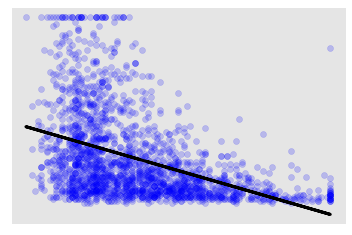

In [59]:
# plot the scatterplot
plt.scatter(df_c.medIncome, df_c.ViolentCrimesPerPop, color="blue", alpha = 0.2) # observed
plt.plot(df_c.medIncome, df_c.ViolentCrimesPerPop_Pred, color="black", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

##### Comments

We have negative R2 value, suggesting that the model is wrong.

#### Multiple Linear Regression

##### 1. Build a multiple regression model

##### Selection of second independent variable

In [60]:
# select only numerical columns from crime data frame
df_c_num = df_c.select_dtypes(include=[np.number])
df_c_num.head(2)

fold  population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0     1        0.19           0.33          0.02          0.90          0.12   
1     1        0.00           0.16          0.12          0.74          0.45   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  numbUrban  \
0         0.17         0.34         0.47         0.29        0.32       0.20   
1         0.07         0.26         0.59         0.35        0.27       0.02   

   pctUrban  medIncome  pctWWage  pctWFarmSelf  pctWInvInc  pctWSocSec  \
0       1.0       0.37      0.72          0.34        0.60        0.29   
1       1.0       0.31      0.72          0.11        0.45        0.25   

   pctWPubAsst  pctWRetire  medFamInc  perCapInc  whitePerCap  blackPerCap  \
0         0.15        0.43       0.39       0.40         0.39         0.32   
1         0.29        0.39       0.29       0.37         0.38         0.33   

   indianPerCap  AsianPerCap  OtherPerCap  HispPerCap  NumUnderPov  \
0          0.27         0.27         0.36        0.41         0.08   
1          0.16         0.30         0.22        0.35         0.01   

   PctPopUnderPov  PctLess9thGrade  PctNotHSGrad  PctBSorMore  PctUnemployed  \
0            0.19             0.10          0.18         0.48           0.27   
1            0.24             0.14          0.24         0.30           0.27   

   PctEmploy  PctEmplManu  PctEmplProfServ  PctOccupManu  PctOccupMgmtProf  \
0       0.68         0.23             0.41          0.25              0.52   
1       0.73         0.57             0.15          0.42              0.36   

   MalePctDivorce  MalePctNevMarr  FemalePctDiv  TotalPctDiv  PersPerFam  \
0            0.68            0.40          0.75         0.75        0.35   
1            1.00            0.63          0.91         1.00        0.29   

   PctFam2Par  PctKids2Par  PctYoungKids2Par  PctTeen2Par  \
0        0.55         0.59              0.61         0.56   
1        0.43         0.47              0.60         0.39   

   PctWorkMomYoungKids  PctWorkMom  NumIlleg  PctIlleg  NumImmig  \
0                 0.74        0.76      0.04      0.14      0.03   
1                 0.46        0.53      0.00      0.24      0.01   

   PctImmigRecent  PctImmigRec5  PctImmigRec8  PctImmigRec10  PctRecentImmig  \
0            0.24          0.27          0.37           0.39            0.07   
1            0.52          0.62          0.64           0.63            0.25   

   PctRecImmig5  PctRecImmig8  PctRecImmig10  PctSpeakEnglOnly  \
0          0.07          0.08           0.08              0.89   
1          0.27          0.25           0.23              0.84   

   PctNotSpeakEnglWell  PctLargHouseFam  PctLargHouseOccup  PersPerOccupHous  \
0                 0.06             0.14               0.13              0.33   
1                 0.10             0.16               0.10              0.17   

   PersPerOwnOccHous  PersPerRentOccHous  PctPersOwnOccup  PctPersDenseHous  \
0               0.39                0.28             0.55              0.09   
1               0.29                0.17             0.26              0.20   

   PctHousLess3BR  MedNumBR  HousVacant  PctHousOccup  PctHousOwnOcc  \
0            0.51       0.5        0.21          0.71           0.52   
1            0.82       0.0        0.02          0.79           0.24   

   PctVacantBoarded  PctVacMore6Mos  MedYrHousBuilt  PctHousNoPhone  \
0              0.05            0.26            0.65            0.14   
1              0.02            0.25            0.65            0.16   

   PctWOFullPlumb  OwnOccLowQuart  OwnOccMedVal  OwnOccHiQuart  RentLowQ  \
0            0.06            0.22          0.19           0.18      0.36   
1            0.00            0.21          0.20           0.21      0.42   

   RentMedian  RentHighQ  MedRent  MedRentPctHousInc  MedOwnCostPctInc  \
0        0.35       0.38     0.34               0.38              0.46   
1        0.38       0.40     0.

In [61]:
# create correlation data frame
df_c_corr = df_c_num.corr()

In [62]:
# check the correlation SalePrice column with the other numerical columns and filter for top 10 (the most correlated 10 variables)
print(df_c_corr['ViolentCrimesPerPop'].sort_values(ascending=False)[:10], '\n')

ViolentCrimesPerPop    1.000000
PctIlleg               0.737957
racepctblack           0.631264
pctWPubAsst            0.574665
FemalePctDiv           0.556032
TotalPctDiv            0.552777
MalePctDivorce         0.525407
PctPopUnderPov         0.521877
PctUnemployed          0.504235
PctHousNoPhone         0.488243
Name: ViolentCrimesPerPop, dtype: float64 



**PctIlleg** is highly correlated with ViolentCrimesPerPop, let's check if we can use this column as the second independent variable.

In [63]:
# look at the correlation of PctIlleg with medIncome
print(df_c_corr["medIncome"].loc['PctIlleg'], '\n')

-0.48865098514618055 



It has negative correlation and its absolute values is less than 0.5, so we can use this value as the second independent variable.
- PctIlleg: percentage of kids born to never married (numeric - decimal)

In [64]:
regr4 = sm.OLS(df_c.ViolentCrimesPerPop,df_c[['medIncome', 'PctIlleg']])

In [65]:
results = regr4.fit()

In [66]:
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.771
Model:                             OLS   Adj. R-squared (uncentered):              0.770
Method:                  Least Squares   F-statistic:                              3346.
Date:                 Tue, 09 Nov 2021   Prob (F-statistic):                        0.00
Time:                         22:12:57   Log-Likelihood:                          831.17
No. Observations:                 1994   AIC:                                     -1658.
Df Residuals:                     1992   BIC:                                     -1647.
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

**Coefficient of determination (R2):** Quantifies how much of the variation in the dependent variable is due to the independent variable. So, in our case, **0.77** of the variation in the **ViolentCrimesPerPop** is due to **medIncome** and **PctIlleg**, that is, 77% of the variation can be explained by inputs.

Multiple Linear Regression model improved compared to Simple Linear Regression model. The new model capture **more variation** while the Simple Linear Regression model was wrong.

### Part 3: Logistic regression to analyse Titanic survival

#### 1. Load the data

In [67]:
df_t = pd.read_csv("titanicDataFull.csv")

In [68]:
df_t.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [69]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2. Comment on the variables and plan the modelling process

#### Identify Independent Variables

Our dependent variable will be **Survived**. We should select some independent variables to include in the model. For the sake of simplicity, let's select 2 categorical and two continuous independent variables. Check categorical variables with their value counts and continuous variables with histograms to understand their distribution.

**Age** and **Fare** might be relevant to survival, so let's check the distribution of the columns.

In [70]:
df_t.pivot_table(index = "Survived", #rows in the pivot table
                     values = ["Age","Fare"], #values in the pivot table 
                     aggfunc = [np.mean], #summary statistics function to be applied in aggregation
                    )

mean           
                Age       Fare
Survived                      
0         30.626179  22.117887
1         28.343690  48.395408

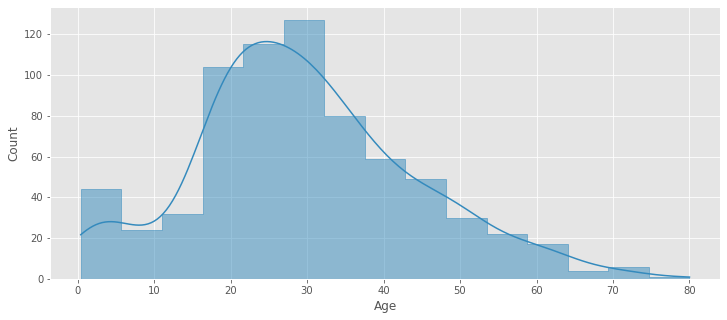

In [71]:
# histogram for Age
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=df_t, x="Age", kde=True, element = 'step', bins=15)

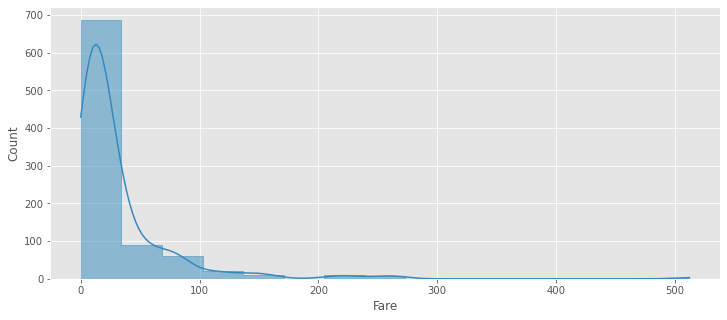

In [72]:
# histogram for Fare
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=df_t, x="Fare", kde=True, element = 'step', bins=15)

Normalization in **Fare** column will be required before feeding it into the model.

Let's select **Pclass** and **Sex** as our categorical independent variables since they can also be relevant to survival.

In [73]:
df_t.groupby(['Pclass'])['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

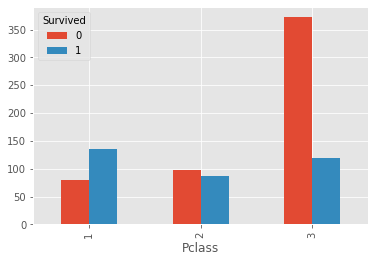

In [74]:
df_t.groupby(['Pclass', 'Survived']).size().unstack().plot.bar(legend=True)
plt.show()

In [75]:
df_t.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

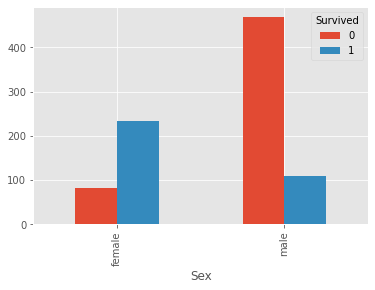

In [76]:
df_t.groupby(['Sex', 'Survived']).size().unstack().plot.bar(legend=True)
plt.show()

##### Comments
We see significant differences in survival ratios in categorical variables.

#### Data Pre-Processing for Model Build

In [77]:
# create feature and target data frames
feature = df_t[['Age','Fare','Pclass','Sex']]
target  = df_t[['Survived']]

# NUMERICAL VARIABLES
# ---
# normalise Fare column using log function to emphasize low values
feature['Fare_N'] = np.log(feature['Fare']+1) # adding 1 to avoid '-inf' in the column

# replace missing values in Age column with column mean
feature['Age'].replace(np.nan, feature['Age'].mean(), inplace = True)

# CATEGORICAL VARIABLES
# ---
# one hot encoding for categorical variables
# add binary columns for every category and append it to the feature data frame
feature = pd.concat([feature, pd.get_dummies(feature['Sex'])], axis=1)
feature = pd.concat([feature, pd.get_dummies(feature['Pclass'])], axis=1)

# drop the original categorical columns and pre-normalised Fare column
feature.drop(['Fare','Pclass','Sex'], axis = 1, inplace=True)

# scale the continuous independent variables in feature data frame
scaler = StandardScaler()
feature[['Age','Fare_N']] = scaler.fit_transform(feature[['Age','Fare_N']])

In [78]:
feature.head()

Age    Fare_N  female  male  1  2  3
0 -0.592481 -0.879741       0     1  0  0  1
1  0.638789  1.361220       1     0  1  0  0
2 -0.284663 -0.798540       1     0  0  0  1
3  0.407926  1.062038       1     0  1  0  0
4  0.407926 -0.784179       0     1  0  0  1

In [79]:
feature.shape

(891, 7)

In [80]:
target.head()

Survived
0         0
1         1
2         1
3         1
4         0

In [81]:
target.shape

(891, 1)

In [82]:
# split the data into training/testing sets
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.1, random_state=42)

print('---')
print("Shape of the independent variable's training dataset: ", feature_train.shape)
print("Shape of the independent variable's test dataset: ", feature_test.shape)
print('---')
print("Shape of the dependent variable's training dataset: ", target_train.shape)
print("Shape of the dependent variable's test dataset: ", target_test.shape)
print('---')

---
Shape of the independent variable's training dataset:  (801, 7)
Shape of the independent variable's test dataset:  (90, 7)
---
Shape of the dependent variable's training dataset:  (801, 1)
Shape of the dependent variable's test dataset:  (90, 1)
---


#### Statsmodel

In [83]:
logit_sm = sm.Logit(target_train, feature_train)

# fit the model
result = logit_sm.fit()

# Let's use the very nice summary function of statsmodels
# This is informing us about the model fit. 
# Pseudo R-squ. is a measure to look into and informing us on the overall fit.

print (result.summary())

Optimization terminated successfully.
         Current function value: 0.460200
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  801
Model:                          Logit   Df Residuals:                      795
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Nov 2021   Pseudo R-squ.:                  0.3080
Time:                        22:12:58   Log-Likelihood:                -368.62
converged:                       True   LL-Null:                       -532.70
Covariance Type:            nonrobust   LLR p-value:                 8.778e-69
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.3587      0.099     -3.618      0.000      -0.553      -0.164
Fare_N         0.0504      0.

#### Scikitlearn

In [84]:
# make a model instance
logisticRegr = LogisticRegression()

# train the model with training data
logisticRegr.fit(feature_train, target_train)

# make a prediction using feature test
predictions = logisticRegr.predict(feature_test)

# measure the performance of the model
score = logisticRegr.score(feature_test, target_test).round(2)

print(score)

0.84


##### Classification Report

In [85]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        54
           1       0.81      0.81      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



These different scores mean different success rates and the relevant score should be considered according to the context.

##### Confusion Matrix

To see True/False Negatives/Positives.

In [86]:
cm = metrics.confusion_matrix(target_test, predictions)
print(cm)

[[47  7]
 [ 7 29]]


Visualise for more pleasing and understandable view.

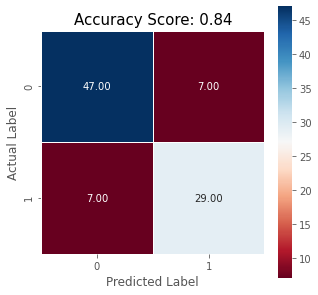

In [87]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'RdBu');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

##### Comments

Out of **90 predictions** that our model made in the test data:
- 47 of them are **True Positives**, they survived and we predicted correct.
- 29 of them are **True Negatives**, they didn't survive and we predicted correct.
- 7 of them are **False Positives**, they survived and we predicted wrong.
- 7 of them are **False Negatives**, they didn't survive and we predicted wrong.